In [2]:
from robustness_dataset import RobustnessDataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

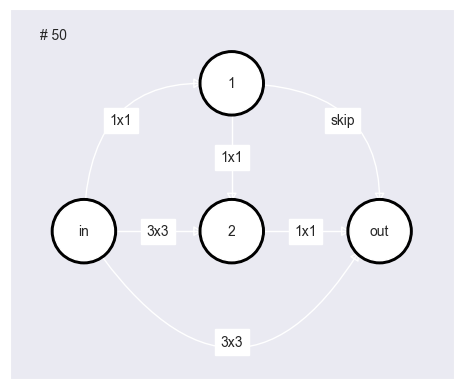

In [3]:
data = RobustnessDataset()
data.draw_arch(i=50)

In [4]:
data.id_to_string(50)

'|nor_conv_1x1~0|+|nor_conv_3x3~0|nor_conv_1x1~1|+|nor_conv_3x3~0|skip_connect~1|nor_conv_1x1~2|'

In [5]:
len(data.non_isomorph_ids)

6466

In [6]:
import tqdm.notebook as tqdm
tqdm = None
result = data.query(
    tqdm = tqdm,
    measure = "confidence",
    data = "cifar10"
)

robustness-dataset/cifar10/clean_confidence.json
robustness-dataset/cifar10/aa_apgd-ce@Linf_confidence.json
robustness-dataset/cifar10/aa_square@Linf_confidence.json
robustness-dataset/cifar10/fgsm@Linf_confidence.json


KeyboardInterrupt: 

In [7]:
tqdm = None
result_acc = data.query(
    tqdm = tqdm,
    measure = "accuracy",
    data = "cifar10"
)

robustness-dataset/cifar10/clean_accuracy.json
robustness-dataset/cifar10/aa_apgd-ce@Linf_accuracy.json
robustness-dataset/cifar10/aa_square@Linf_accuracy.json
robustness-dataset/cifar10/fgsm@Linf_accuracy.json
robustness-dataset/cifar10/pgd@Linf_accuracy.json
robustness-dataset/cifar10/brightness_accuracy.json
robustness-dataset/cifar10/contrast_accuracy.json
robustness-dataset/cifar10/defocus_blur_accuracy.json
robustness-dataset/cifar10/elastic_transform_accuracy.json
robustness-dataset/cifar10/fog_accuracy.json
robustness-dataset/cifar10/frost_accuracy.json
robustness-dataset/cifar10/gaussian_noise_accuracy.json
robustness-dataset/cifar10/glass_blur_accuracy.json
robustness-dataset/cifar10/impulse_noise_accuracy.json
robustness-dataset/cifar10/jpeg_compression_accuracy.json
robustness-dataset/cifar10/motion_blur_accuracy.json
robustness-dataset/cifar10/pixelate_accuracy.json
robustness-dataset/cifar10/shot_noise_accuracy.json
robustness-dataset/cifar10/snow_accuracy.json
robustness

In [7]:
tqdm = None
result_cm = data.query(
    tqdm = tqdm,
    measure = "cm",
    data = "cifar10"
)

robustness-dataset/cifar10/clean_cm.json
robustness-dataset/cifar10/aa_apgd-ce@Linf_cm.json
robustness-dataset/cifar10/aa_square@Linf_cm.json
robustness-dataset/cifar10/fgsm@Linf_cm.json
robustness-dataset/cifar10/pgd@Linf_cm.json
robustness-dataset/cifar10/brightness_cm.json
robustness-dataset/cifar10/contrast_cm.json
robustness-dataset/cifar10/defocus_blur_cm.json
robustness-dataset/cifar10/elastic_transform_cm.json
robustness-dataset/cifar10/fog_cm.json
robustness-dataset/cifar10/frost_cm.json
robustness-dataset/cifar10/gaussian_noise_cm.json
robustness-dataset/cifar10/glass_blur_cm.json
robustness-dataset/cifar10/impulse_noise_cm.json
robustness-dataset/cifar10/jpeg_compression_cm.json
robustness-dataset/cifar10/motion_blur_cm.json
robustness-dataset/cifar10/pixelate_cm.json
robustness-dataset/cifar10/shot_noise_cm.json
robustness-dataset/cifar10/snow_cm.json
robustness-dataset/cifar10/zoom_blur_cm.json


In [228]:
import math

import numpy as np

# Some keys used for the following dictionaries
COUNT = 'count'
CONF = 'conf'
ACC = 'acc'
BIN_ACC = 'bin_acc'
BIN_CONF = 'bin_conf'

def _bin_initializer(bin_dict, num_bins=10):
    for i in range(num_bins):
        bin_dict[i][COUNT] = 0
        bin_dict[i][CONF] = 0
        bin_dict[i][ACC] = 0
        bin_dict[i][BIN_ACC] = 0
        bin_dict[i][BIN_CONF] = 0

def _populate_bins(confs, preds, labels, num_bins=10):
    bin_dict = {}
    for i in range(num_bins):
        bin_dict[i] = {}
    _bin_initializer(bin_dict, num_bins)
    num_test_samples = len(confs)

    for i in range(0, num_test_samples):
        confidence = confs[i]
        prediction = preds[i]
        label = labels[i]
        if confidence == 0:
            continue
        binn = int(math.ceil(((num_bins * confidence) - 1)))
        # print(binn)
        bin_dict[binn][COUNT] = bin_dict[binn][COUNT] + 1
        bin_dict[binn][CONF] = bin_dict[binn][CONF] + confidence
        bin_dict[binn][ACC] = bin_dict[binn][ACC] + \
            (1 if (label == prediction) else 0)

    for binn in range(0, num_bins):
        if (bin_dict[binn][COUNT] == 0):
            bin_dict[binn][BIN_ACC] = 0
            bin_dict[binn][BIN_CONF] = 0
        else:
            bin_dict[binn][BIN_ACC] = float(
                bin_dict[binn][ACC]) / bin_dict[binn][COUNT]
            bin_dict[binn][BIN_CONF] = bin_dict[binn][CONF] / \
                float(bin_dict[binn][COUNT])
    return bin_dict


def expected_calibration_error(confs, preds, labels, num_bins=10):
    bin_dict = _populate_bins(confs, preds, labels, num_bins)
    num_samples = len(labels)
    ece = 0
    for i in range(num_bins):
        bin_accuracy = bin_dict[i][BIN_ACC]
        bin_confidence = bin_dict[i][BIN_CONF]
        bin_count = bin_dict[i][COUNT]
        ece += (float(bin_count) / num_samples) * \
            abs(bin_accuracy - bin_confidence)
    return ece

In [86]:
# print(result["cifar10"]["clean"]["confidence"].keys())
avg = []
print(data.meta["epsilons"]["fgsm@Linf"])
temp = result["cifar10"]["fgsm@Linf"]["confidence"]['0']['argmax'][data.meta["epsilons"]["fgsm@Linf"].index(8.0)]
print(temp)
ece = []
for ls in temp:
    ece.append([max(ls)])
print(ece)
print(len(temp))

# for ls in result["cifar10"]["clean"]["confidence"]['15624']['label']:
#     avg.append(sum(ls)/len(ls))
# print(avg)
# print(f"ece = {sum(avg)/len(avg)}")
# print(f"mece = {max(avg)}")

[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 255.0]
[[0.751, 0.008, 0.074, 0.021, 0.028, 0.001, 0.014, 0.005, 0.063, 0.035], [0.007, 0.855, 0.013, 0.01, 0.01, 0.001, 0.028, 0.003, 0.034, 0.039], [0.017, 0.002, 0.799, 0.06, 0.04, 0.011, 0.046, 0.005, 0.014, 0.005], [0.006, 0.002, 0.062, 0.806, 0.039, 0.026, 0.045, 0.004, 0.004, 0.006], [0.008, 0.003, 0.057, 0.051, 0.807, 0.014, 0.032, 0.012, 0.009, 0.007], [0.001, 0.001, 0.041, 0.087, 0.041, 0.782, 0.03, 0.013, 0.001, 0.003], [0.004, 0.008, 0.055, 0.054, 0.028, 0.01, 0.814, 0.003, 0.015, 0.008], [0.006, 0.002, 0.041, 0.031, 0.051, 0.026, 0.018, 0.813, 0.005, 0.008], [0.033, 0.013, 0.03, 0.018, 0.019, 0.001, 0.025, 0.003, 0.824, 0.035], [0.018, 0.015, 0.012, 0.016, 0.009, 0.002, 0.014, 0.003, 0.044, 0.866]]
[[0.751], [0.855], [0.799], [0.806], [0.807], [0.782], [0.814], [0.813], [0.824], [0.866]]
10


In [13]:
import numpy as np
# for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
np.array(result_cm["cifar10"]["fgsm@Linf"]["cm"]['13433'][data.meta["epsilons"]["fgsm@Linf"].index(3)])

array([[189,  47, 199,  57, 134,  13,  40,  26, 234,  61],
       [ 53, 303,  11,  17,   6,  19,  61,  14, 129, 387],
       [126,   6, 136, 159, 199, 121, 163,  52,  17,  21],
       [ 22,  13, 116,  45, 133, 418, 144,  50,  33,  26],
       [ 37,   3, 193, 172, 103, 127, 153, 194,  17,   1],
       [ 20,   4, 149, 470,  92,  74,  46, 129,   7,   9],
       [ 19,  24, 208, 252, 163,  81, 169,  18,  28,  38],
       [ 37,  13,  54, 101, 274, 294,  27, 165,  11,  24],
       [219,  87,  41,  38,  41,  15,  50,  10, 415,  84],
       [102, 332,  14,  46,  21,  27,  12,  22, 126, 298]])

In [107]:
import numpy as np
confs = result["cifar10"]["fgsm@Linf"]["confidence"]['13433']['argmax'][data.meta["epsilons"]["fgsm@Linf"].index(3)]
preds = result["cifar10"]["fgsm@Linf"]["confidence"]['13433']['prediction'][data.meta["epsilons"]["fgsm@Linf"].index(3)]
labels = result["cifar10"]["fgsm@Linf"]["confidence"]['13433']['label'][data.meta["epsilons"]["fgsm@Linf"].index(3)]

# print(np.array(confs))
# print(f"preds: {preds}")
# print(np.array(labels))
ece = expected_calibration_error(preds, confs,labels, num_bins=10)
print(ece)

0.17770000000000002


In [19]:
import calibration as cal
import numpy as np
confs = np.array(result["cifar10"]["clean"]["confidence"])
preds = np.array(result["cifar10"]["fgsm@Linf"]["confidence"]['0']['prediction'][data.meta["epsilons"]["fgsm@Linf"].index(8.0)])
# labels = np.array(result["cifar10"]["fgsm@Linf"]["confidence"]['0']['label'][data.meta["epsilons"]["fgsm@Linf"].index(8.0)])
labels = np.array(result_cm["cifar10"]["fgsm@Linf"]["cm"]['0'][data.meta["epsilons"]["fgsm@Linf"].index(8.0)])
# labels = [0] * 9 + [1]
print(confs.shape)
print("------")
print(preds)
print("------")
print(labels)
ece = cal.get_ece(confs, [0,1,2,3,4,5,6,7,8,9])
print(ece)

()
------
[0.703 0.818]
------
[[ 18  48 312  52 108   2  64  20 305  71]
 [ 56  12  41  17  21   0  83   8 200 562]
 [ 70   9  79 185 219  59 276  25  45  33]
 [ 16   9 217  31 171 173 288  37  32  26]
 [ 24   3 293 187  50  50 272  91  15  15]
 [  2   4 185 470  75   5 161  56  22  20]
 [ 12  12 342 328 198  23  33  12  16  24]
 [ 25   6 186 240 253 129  93   8  19  41]
 [186  51 196  52  91   2  47   4 211 160]
 [ 74 339  90  43  76   4  95  22 224  33]]


IndexError: tuple index out of range

In [10]:
result["cifar10"]["clean"]["confidence"][data.get_uid(50)]

{'label': [[0.941,
   0.003,
   0.012,
   0.007,
   0.003,
   0.001,
   0.002,
   0.004,
   0.023,
   0.005],
  [0.005, 0.97, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.001, 0.022],
  [0.017, 0.0, 0.899, 0.023, 0.019, 0.015, 0.016, 0.005, 0.003, 0.003],
  [0.008, 0.002, 0.021, 0.845, 0.022, 0.071, 0.016, 0.007, 0.005, 0.002],
  [0.001, 0.0, 0.018, 0.02, 0.936, 0.007, 0.008, 0.01, 0.0, 0.001],
  [0.003, 0.001, 0.016, 0.065, 0.016, 0.881, 0.004, 0.014, 0.0, 0.0],
  [0.005, 0.001, 0.012, 0.018, 0.004, 0.006, 0.95, 0.0, 0.001, 0.002],
  [0.005, 0.0, 0.005, 0.008, 0.02, 0.015, 0.001, 0.944, 0.001, 0.001],
  [0.024, 0.005, 0.003, 0.004, 0.001, 0.001, 0.001, 0.0, 0.953, 0.008],
  [0.009, 0.028, 0.001, 0.005, 0.0, 0.0, 0.001, 0.0, 0.01, 0.945]],
 'argmax': [[0.968,
   0.002,
   0.008,
   0.003,
   0.001,
   0.001,
   0.001,
   0.002,
   0.01,
   0.003],
  [0.003, 0.984, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.003, 0.009],
  [0.004, 0.0, 0.969, 0.008, 0.005, 0.005, 0.005, 0.002, 0.001, 0.0],
  [0.003, 0.0, 0.

In [69]:
result["cifar10"]["pgd@Linf"]["confidence"][data.get_uid(13433)][data.meta["epsilons"]["pgd@Linf"].index(1.0)]

KeyError: 2

# Mean Accuracies

In [214]:
from statistics import mean
acc = {d:{} for d in result.keys()}
for d in ['cifar10']:
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
        if attack in result[d]:
            # # acc[d][attack] = [[result[d]["clean"]["accuracy"][idx]] + r for idx, r in result[d][attack]["accuracy"].items()]
            # for idx, r in result[d][attack]["confidence"].items():
            #     temp = []
            #     for ls in r['prediction']:
            #         temp.append(mean(ls))
            # # acc[d][attack] = [[mean(result[d]["clean"]["confidence"][idx]['prediction'])] + temp]
            # acc[d][attack] = [[mean(result[d]["clean"]["confidence"][idx]['prediction'])] + temp for idx, r in result[d][attack]["confidence"].items()]
            # # print(idx)
            # # print(r['prediction'])
            acc[d][attack] = []

            for idx, r in result[d][attack]["confidence"].items():
                clean_acc = [mean(result[d]["clean"]["confidence"][idx]['prediction'])]
                temp = []
                for ls in r['prediction']:
                    temp.append(mean(ls))
                acc[d][attack].append(clean_acc + temp)

            print(acc[d][attack])


[[0.8045, 0.8125, 0.8335, 0.837, 0.829, 0.8185, 0.8015, 0.8049999999999999, 0.792, 0.7765, 0.7605, 0.9624999999999999], [0.9275, 0.931, 0.9450000000000001, 0.9455, 0.9425, 0.9359999999999999, 0.9325, 0.9295, 0.9255, 0.9219999999999999, 0.9165000000000001, 0.994], [0.8025, 0.8075, 0.8225, 0.8280000000000001, 0.825, 0.815, 0.8015, 0.784, 0.77, 0.7595, 0.7375, 0.9395], [0.782, 0.786, 0.7945, 0.8005, 0.7865, 0.7695000000000001, 0.76, 0.7355, 0.7135, 0.7215, 0.7115, 0.9844999999999999], [0.8025, 0.8065, 0.8180000000000001, 0.821, 0.8180000000000001, 0.8089999999999999, 0.7975, 0.7729999999999999, 0.76, 0.7425, 0.7350000000000001, 0.8965000000000001], [0.9035, 0.9145, 0.927, 0.9279999999999999, 0.924, 0.9245000000000001, 0.9195, 0.9135, 0.91, 0.904, 0.8935, 0.769], [0.9219999999999999, 0.927, 0.937, 0.9385, 0.9375, 0.931, 0.9279999999999999, 0.9225, 0.9195, 0.9145000000000001, 0.9105000000000001, 0.6125], [0.8835, 0.8999999999999999, 0.909, 0.9005000000000001, 0.8915, 0.885, 0.8795, 0.8755, 

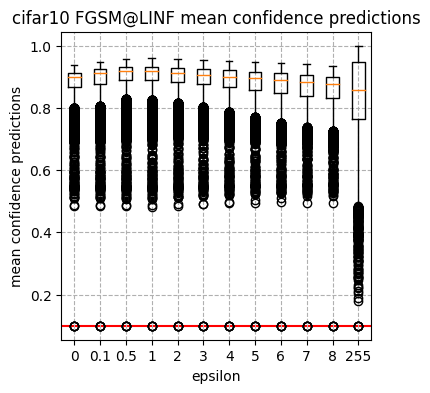

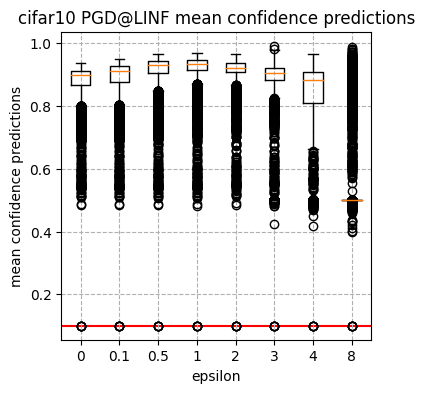

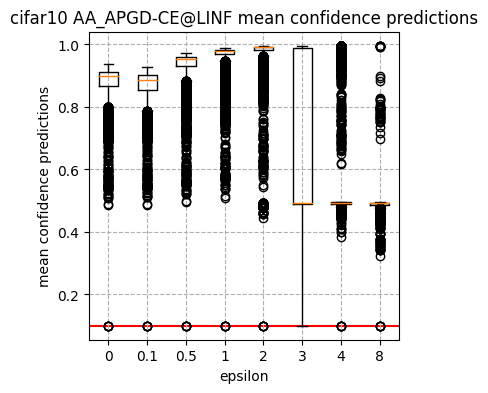

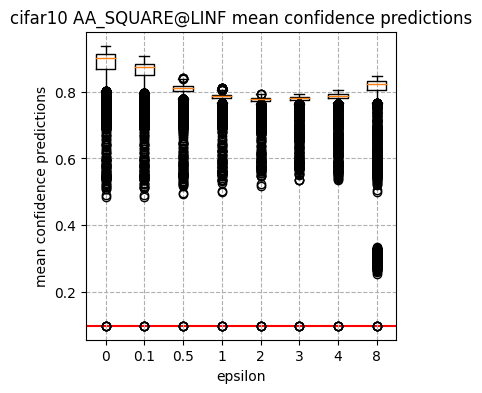

In [215]:
for d in acc.keys():
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
        if attack in acc[d]:
            plt.figure(figsize=(4,4))
            plt.grid(linestyle="--")
            plt.boxplot(np.array(acc[d][attack]))
            eps = data.meta["epsilons"][attack]
            eps = [0] + [int(e) if int(e)==e else e for e in eps]
            plt.xticks(range(1,len(eps)+1), labels=eps)
            plt.xlabel("epsilon")
            plt.ylabel("mean confidence predictions")
            plt.title(f"{d} {str(attack).upper()} mean confidence predictions")
            classes = 10 if d == "cifar10" else 100 if d == "cifar100" else 120
            plt.plot([.5,len(eps)+.5],[1/classes,1/classes], color="red", alpha=1, zorder=-1)
            plt.xlim(.5,len(eps)+.5)
            plt.show()

In [229]:
from statistics import mean
acc = {d:{} for d in result.keys()}
for d in ['cifar10']:
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
    # for attack in ["fgsm@Linf"]:
        if attack in result[d]:
            acc[d][attack] = []

            for idx, r in result[d][attack]["confidence"].items():
                confs_clean = result["cifar10"]["clean"]["confidence"][idx]['argmax']
                preds_clean = result["cifar10"]["clean"]["confidence"][idx]['prediction']
                labels_clean = result["cifar10"]["clean"]["confidence"][idx]['label']
                clean_ece = expected_calibration_error(preds_clean, confs_clean, labels_clean, num_bins=10)
                # clean_ece = [mean(result[d]["clean"]["confidence"][idx]['prediction'])]
                temp = []
                # print(data.meta["epsilons"][attack])

                for epsilon in data.meta["epsilons"][attack]:
                    # epsilon = int(epsilon)
                    # print(epsilon, attack)
                    # temp.append(mean(ls))
                    # print(result["cifar10"]["pgd@Linf"]["confidence"]['13433']['argmax'][5])
                    confs = result["cifar10"][attack]["confidence"][idx]['argmax'][data.meta["epsilons"][attack].index(epsilon)]
                    preds = result["cifar10"][attack]["confidence"][idx]['prediction'][data.meta["epsilons"][attack].index(epsilon)]
                    labels = result["cifar10"][attack]["confidence"][idx]['label'][data.meta["epsilons"][attack].index(epsilon)]
                    # print(preds)
                    attack_ece = expected_calibration_error(preds, confs, labels, num_bins=10)
                    temp.append(attack_ece)

                acc[d][attack].append([clean_ece] + temp)

        print(acc[d][attack])

[[0.16090000000000002, 0.1625, 0.16670000000000001, 0.1674, 0.1658, 0.1637, 0.1603, 0.161, 0.15839999999999999, 0.1553, 0.1521, 0.1925], [0.1855, 0.1862, 0.18900000000000003, 0.18910000000000002, 0.1885, 0.1872, 0.1865, 0.1859, 0.18510000000000001, 0.1844, 0.18330000000000002, 0.0988], [0.16050000000000003, 0.16150000000000003, 0.16450000000000004, 0.16560000000000002, 0.165, 0.163, 0.1603, 0.1568, 0.154, 0.1519, 0.14750000000000002, 0.1879], [0.15640000000000004, 0.1572, 0.15889999999999999, 0.16010000000000002, 0.1573, 0.1539, 0.15200000000000002, 0.1471, 0.1427, 0.1443, 0.1423, 0.1969], [0.16050000000000003, 0.1613, 0.16360000000000002, 0.1642, 0.16360000000000002, 0.1618, 0.1595, 0.15460000000000002, 0.152, 0.14850000000000002, 0.14700000000000002, 0.17930000000000001], [0.1807, 0.1829, 0.1854, 0.1856, 0.18480000000000002, 0.18490000000000004, 0.1839, 0.1827, 0.18200000000000002, 0.18080000000000002, 0.17870000000000003, 0.15380000000000002], [0.1844, 0.1854, 0.1874, 0.1877, 0.1875

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [240]:
import numpy as np

confs = result["cifar10"]["pgd@Linf"]["confidence"]['13433']['argmax'][data.meta["epsilons"]["pgd@Linf"].index(4)]
preds = result["cifar10"]["pgd@Linf"]["confidence"]['13433']['prediction'][data.meta["epsilons"]["pgd@Linf"].index(4)]
labels = result["cifar10"]["pgd@Linf"]["confidence"]['13433']['label'][data.meta["epsilons"]["pgd@Linf"].index(4)]
print(confs)
print("------")
print(preds)
print("------")
print(labels)
# print(np.array(confs))
# print(f"preds: {preds}")
# print(np.array(labels))
ece = expected_calibration_error(preds, confs, labels, num_bins=10)
print(ece)
print()
confs_clean = result["cifar10"]["clean"]["confidence"]['13433']['argmax']
preds_clean = result["cifar10"]["clean"]["confidence"]['13433']['prediction']
labels_clean = result["cifar10"]["clean"]["confidence"]['13433']['label']
print(confs_clean)
print("------")
print(preds_clean)
print("------")
print(labels_clean)
clean_ece = expected_calibration_error(preds_clean, labels_clean, confs_clean, num_bins=15)
print(clean_ece)


[[0.999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.997, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.999, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.997]]
------
[0.0, 0.999]
------
[[0.0, 0.066, 0.262, 0.073, 0.156, 0.017, 0.039, 0.026, 0.288, 0.072], [0.069, 0.005, 0.023, 0.028, 0.01, 0.029, 0.071, 0.02, 0.151, 0.594], [0.167, 0.008, 0.0, 0.168, 0.225, 0.147, 0.186, 0.055, 0.024, 0.018], [0.029, 0.012, 0.12, 0.0, 0.138, 0.423, 0.162, 0.057, 0.032, 0.028], [0.052, 0.003, 0.219, 0.17, 0.0, 0.148, 0.169, 0.211, 0.02, 0.007], [0.021, 0.004, 0.148, 0.513, 0.095, 0.0, 0.055, 0.144, 0.01, 0.008], [0.023, 0.035, 0.27

In [235]:
confs = result["cifar10"]["clean"]["confidence"]['13433']['argmax']
preds = result["cifar10"]["clean"]["confidence"]['13433']['prediction']
labels = result["cifar10"]["clean"]["confidence"]['13433']['label']
print(preds)

[0.97, 0.792]


In [147]:
for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
    print(data.meta["epsilons"][attack])

[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 255.0]
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]


In [28]:
import pandas as pd
fgsm_Linf_acc = []
pgd_Linf_acc = []
aa_apgd_ce_Linf_acc = []
aa_square_Linf_acc = []
acc = {d:{} for d in result_acc.keys()}
for d in acc.keys():
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
        if attack in result_acc[d]:
            for idx, r in result_acc[d][attack]["accuracy"].items():
                # print(idx)
                if attack == "fgsm@Linf":
                    print(idx)
                    fgsm_Linf_acc.append(idx)
                elif attack == "pgd@Linf":
                    pgd_Linf_acc.append(r)
                elif attack == "aa_apgd-ce@Linf":
                    aa_apgd_ce_Linf_acc.append(r)
                elif attack == "aa_square@Linf":
                    aa_square_Linf_acc.append(r)
print(len(fgsm_Linf_acc))
df = pd.DataFrame(zip(fgsm_Linf_acc, pgd_Linf_acc, aa_apgd_ce_Linf_acc, aa_square_Linf_acc))
# print(df)
# df.to_csv("attack_acc.csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
26
27
28
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
71
73
74
75
76
77
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
98
99
100
101
102
103
106
107
109
110
111
112
113
114
115
116
117
118
121
122
123
124
126
127
128
129
130
131
133
134
135
136
137
138
139
140
141
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
162
163
164
165
167
168
169
171
172
173
174
175
177
178
179
181
183
184
185
187
188
189
190
191
192
193
194
195
197
198
199
200
202
203
204
205
206
207
208
209
211
214
216
218
219
221
222
224
226
227
228
229
231
232
234
236
237
238
239
240
241
242
244
245
246
247
248
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
271
272
273
274
276
277
279
280
282
283
285
286
288
289
290
291
292
293
296
297
298
300
301
302
303
305
306
307
308
309
310
311
312
314
315
316
317
318
319
320
322
324
325
326
327
328
3

In [36]:
corruption = ['brightness','contrast','defocus_blur','elastic_transform','fog','frost','gaussian_noise','glass_blur','impulse_noise','jpeg_compression', 'motion_blur','pixelate','shot_noise','snow','zoom_blur']
print(len(corruption))
for corrupt in corruption:
    print(result_acc['cifar10'][corrupt]["accuracy"][data.get_uid(0)][2])
# print(data.meta["epsilons"]['gaussian_noise'])

15
0.741
0.266
0.439
0.442
0.404
0.45
0.249
0.296
0.498
0.561
0.289
0.554
0.325
0.545
0.324


In [8]:
import pandas as pd
clean_acc = []
fgsm_Linf_acc = []
pgd_Linf_acc = []
aa_apgd_ce_Linf_acc = []
aa_square_Linf_acc = []
adversial_attack = ["clean", "fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]
corruption = ['brightness','contrast','defocus_blur','elastic_transform','fog','frost','gaussian_noise','glass_blur','impulse_noise','jpeg_compression', 'motion_blur','pixelate','shot_noise','snow','zoom_blur']
brightness = []
contrast = []
defocus_blur = []
elastic_transform = []
fog=[]
frost=[]
gaussian_noise=[]
glass_blur=[]
impulse_noise=[]
jpeg_compression=[]
motion_blur=[]
pixelate=[]
shot_noise=[]
snow=[]
zoom_blur=[]
overall_attack = adversial_attack + corruption
print(overall_attack)
i = 0
for attack in overall_attack:
    for idx in range(15625):
        acc = result_acc['cifar10'][attack]["accuracy"][data.get_uid(idx)]
        if attack == "clean":
            clean_acc.append(acc)
        elif attack == "fgsm@Linf":
            fgsm_Linf_acc.append(acc)
        elif attack == "pgd@Linf":
            pgd_Linf_acc.append(acc)
        elif attack == "aa_apgd-ce@Linf":
            aa_apgd_ce_Linf_acc.append(acc)
        elif attack == "aa_square@Linf":
            aa_square_Linf_acc.append(acc)
        if attack in corruption:
            acc = result_acc['cifar10'][attack]["accuracy"][data.get_uid(idx)][2]
            if i == 0:
                brightness.append(acc)
            elif i == 1:
                contrast.append(acc)
            elif i == 2:
                defocus_blur.append(acc)
            elif i == 3:
                elastic_transform.append(acc)
            elif i == 4:
                fog.append(acc)
            elif i == 5:
                frost.append(acc)
            elif i == 6:
                gaussian_noise.append(acc)
            elif i == 7:
                glass_blur.append(acc)
            elif i == 8:
                impulse_noise.append(acc)
            elif i == 9:
                jpeg_compression.append(acc)
            elif i == 10:
                motion_blur.append(acc)
            elif i == 11:
                pixelate.append(acc)
            elif i == 12:
                shot_noise.append(acc)
            elif i == 13:
                snow.append(acc)
            elif i == 14:
                zoom_blur.append(acc)
    if attack in corruption:
        i+=1
# print(brightness)
df = pd.DataFrame(zip(clean_acc, fgsm_Linf_acc, pgd_Linf_acc, aa_apgd_ce_Linf_acc, aa_square_Linf_acc))
df_corruption = pd.DataFrame(zip(brightness, contrast, defocus_blur,elastic_transform, fog, frost, gaussian_noise,
                                 glass_blur, impulse_noise, jpeg_compression, motion_blur, pixelate, shot_noise,
                                 snow, zoom_blur))
print(df)
print(df_corruption)
# df.to_csv("attack_acc.csv")

['clean', 'fgsm@Linf', 'pgd@Linf', 'aa_apgd-ce@Linf', 'aa_square@Linf', 'brightness', 'contrast', 'defocus_blur', 'elastic_transform', 'fog', 'frost', 'gaussian_noise', 'glass_blur', 'impulse_noise', 'jpeg_compression', 'motion_blur', 'pixelate', 'shot_noise', 'snow', 'zoom_blur']
           0                                                  1  \
0      0.856  [0.806, 0.582, 0.35, 0.13, 0.066, 0.046, 0.038...   
1      0.938  [0.887, 0.716, 0.619, 0.532, 0.491, 0.463, 0.4...   
2      0.858  [0.819, 0.639, 0.431, 0.195, 0.1, 0.062, 0.047...   
3      0.868  [0.819, 0.572, 0.317, 0.098, 0.034, 0.017, 0.0...   
4      0.881  [0.83, 0.574, 0.337, 0.136, 0.078, 0.057, 0.05...   
...      ...                                                ...   
15620  0.869  [0.819, 0.577, 0.315, 0.086, 0.03, 0.014, 0.01...   
15621  0.892  [0.849, 0.632, 0.411, 0.197, 0.123, 0.094, 0.0...   
15622  0.925  [0.881, 0.703, 0.602, 0.531, 0.504, 0.486, 0.4...   
15623  0.694  [0.673, 0.572, 0.453, 0.269, 0.155

In [13]:
df_corruption.columns = corruption
df_corruption.to_csv("corruption_acc.csv", index=False)
print(df_corruption)

       brightness  contrast  defocus_blur  elastic_transform    fog  frost  \
0           0.741     0.266         0.439              0.442  0.404  0.450   
1           0.886     0.552         0.629              0.615  0.714  0.577   
2           0.757     0.270         0.494              0.491  0.422  0.495   
3           0.737     0.271         0.450              0.446  0.380  0.438   
4           0.773     0.304         0.523              0.511  0.442  0.428   
...           ...       ...           ...                ...    ...    ...   
15620       0.737     0.263         0.446              0.452  0.392  0.441   
15621       0.794     0.282         0.515              0.523  0.478  0.485   
15622       0.865     0.451         0.583              0.555  0.668  0.542   
15623       0.498     0.255         0.463              0.440  0.286  0.424   
15624       0.718     0.335         0.431              0.436  0.466  0.418   

       gaussian_noise  glass_blur  impulse_noise  jpeg_compress

In [10]:
df.columns = ['clean_acc', 'fgsm_Linf_acc','pgd_Linf_acc', 'aa_apgd_ce_Linf_acc', 'aa_square_Linf_acc']
# 使用apply(pd.Series)方法将列表列拆分成多列
attack = ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]
no = 0
for attack_acc in ['fgsm_Linf_acc','pgd_Linf_acc', 'aa_apgd_ce_Linf_acc', 'aa_square_Linf_acc']:
    new_columns = df[attack_acc].apply(pd.Series)
    print(data.meta["epsilons"][attack[no]])
    ls_name = []
    for epsilon in data.meta["epsilons"][attack[no]]:
        epsilon = str(epsilon).replace(".", "_")
        ls_name.append(attack_acc + epsilon)
    print(ls_name)
    new_columns.columns = ls_name
    # 将新列添加到原始DataFrame中
    df = pd.concat([df, new_columns], axis=1)
    # 删除原始的列表列
    df.drop(attack_acc, axis=1, inplace=True)
    no += 1
print(df)
df.to_csv("attack_acc.csv", index=False)

[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 255.0]
['fgsm_Linf_acc0_1', 'fgsm_Linf_acc0_5', 'fgsm_Linf_acc1_0', 'fgsm_Linf_acc2_0', 'fgsm_Linf_acc3_0', 'fgsm_Linf_acc4_0', 'fgsm_Linf_acc5_0', 'fgsm_Linf_acc6_0', 'fgsm_Linf_acc7_0', 'fgsm_Linf_acc8_0', 'fgsm_Linf_acc255_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['pgd_Linf_acc0_1', 'pgd_Linf_acc0_5', 'pgd_Linf_acc1_0', 'pgd_Linf_acc2_0', 'pgd_Linf_acc3_0', 'pgd_Linf_acc4_0', 'pgd_Linf_acc8_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['aa_apgd_ce_Linf_acc0_1', 'aa_apgd_ce_Linf_acc0_5', 'aa_apgd_ce_Linf_acc1_0', 'aa_apgd_ce_Linf_acc2_0', 'aa_apgd_ce_Linf_acc3_0', 'aa_apgd_ce_Linf_acc4_0', 'aa_apgd_ce_Linf_acc8_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['aa_square_Linf_acc0_1', 'aa_square_Linf_acc0_5', 'aa_square_Linf_acc1_0', 'aa_square_Linf_acc2_0', 'aa_square_Linf_acc3_0', 'aa_square_Linf_acc4_0', 'aa_square_Linf_acc8_0']
       clean_acc  fgsm_Linf_acc0_1  fgsm_Linf_acc0_5  fgsm_Linf_acc1_0  \
0          0.856             0.806          

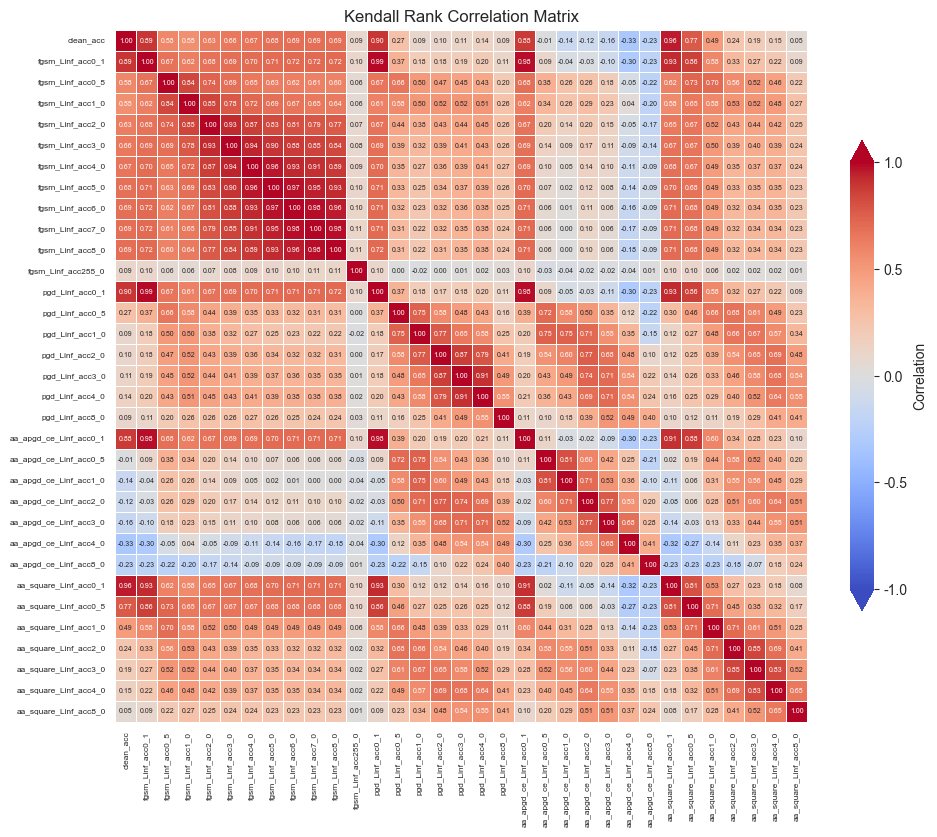

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
kendall_matrix = df.corr(method='kendall')
# Generate the heatmap for the Kendall rank correlation matrix
sns.heatmap(kendall_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 5}, linewidths=0.5, square=True,
            cbar_kws={'label': 'Correlation', 'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1], 'shrink': 0.5, 'format': '%.1f', 'extend': 'both'})


# Set the title for the heatmap
plt.title("Kendall Rank Correlation Matrix")

# Display the heatmap

# Rotate x-axis labels and adjust font size
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig('./all_kendall.png', dpi=1000)
plt.show()

In [12]:
import pandas as pd
import seaborn as sns
df2 = pd.read_csv("/Users/haolan/Library/CloudStorage/OneDrive-TheUniversityofSydney(Students)/USYD/ML/lab/NATS_Bench_Calibration/summary/cifar10/cifar10_full.csv")
# print(df2.columns)

selected_columns_df2 = df2[['15bins-ece-pre', '15bins-adaece-pre', '15bins-classece-pre', 'pre_auc_cifar10c', 'pre_auc_svhn']]


In [13]:
overall_df = pd.concat([df, selected_columns_df2, df_corruption], axis=1)


In [16]:
# print(overall_df)
plt.figure(figsize=(12, 12))
kendall_matrix = overall_df.corr(method='kendall')
# Generate the heatmap for the Kendall rank correlation matrix
sns.heatmap(kendall_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 5}, linewidths=0.5, square=True,
            cbar_kws={'label': 'Correlation', 'orientation': 'vertical', 'ticks': [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], 'shrink': 0.5, 'format': '%.2f', 'extend': 'both'})


# Set the title for the heatmap
plt.title("Kendall Rank Correlation Matrix")

# Display the heatmap

# Rotate x-axis labels and adjust font size
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig('./all_kendall.png', dpi=1000)
plt.show()

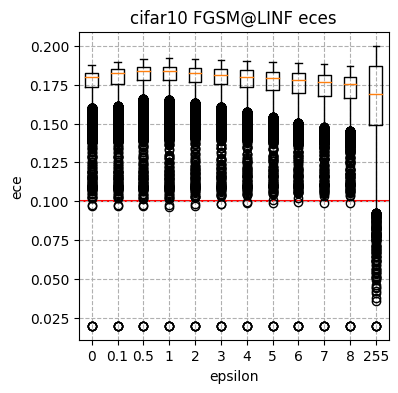

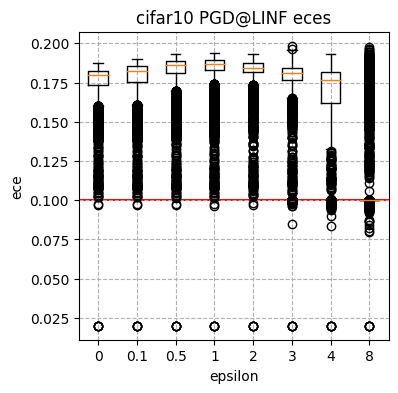

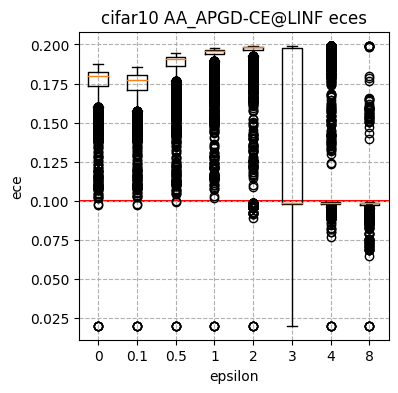

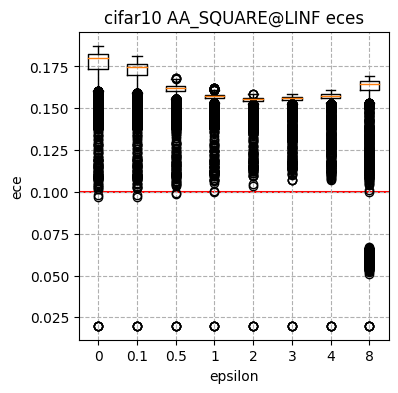

In [230]:

for d in acc.keys():
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
        if attack in acc[d]:
            plt.figure(figsize=(4,4))
            plt.grid(linestyle="--")
            plt.boxplot(np.array(acc[d][attack]))
            eps = data.meta["epsilons"][attack]
            eps = [0] + [int(e) if int(e)==e else e for e in eps]
            plt.xticks(range(1,len(eps)+1), labels=eps)
            plt.xlabel("epsilon")
            plt.ylabel("ece")
            plt.title(f"{d} {str(attack).upper()} eces")
            classes = 10 if d == "cifar10" else 100 if d == "cifar100" else 120
            plt.plot([.5,len(eps)+.5],[1/classes,1/classes], color="red", alpha=1, zorder=-1)
            plt.xlim(.5,len(eps)+.5)
            plt.show()